# D210 - Reporting and Representation

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell 

pd.set_option('display.max_columns', None)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('medical_clean.csv', index_col='Customer_id')

In [9]:
df.shape

(10000, 49)

In [10]:
df.head()

,CaseOrder,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C412403,1,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
Z919181,2,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
F995323,3,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
A879973,4,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
C544523,5,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [11]:
survey_df = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]

In [12]:
survey_df.rename(columns={'Item1':'Timely_Admission', 'Item2':'Timely_Treatment', 'Item3':'Timely_Visits', 'Item4':'Reliability',
                          'Item5':'Options', 'Item6':'HoursofTreatment', 'Item7':'Courteous_Staff', 'Item8':'Active_Listening_Doctor'}, inplace=True)

In [13]:
df.drop(['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'], axis=1, inplace=True)

In [14]:
survey_df.head()

,Timely_Admission,Timely_Treatment,Timely_Visits,Reliability,Options,HoursofTreatment,Courteous_Staff,Active_Listening_Doctor
Customer_id,,,,,,,,
C412403,3,3,2,2,4,3,3,4
Z919181,3,4,3,4,4,4,3,3
F995323,2,4,4,4,3,4,3,3
A879973,3,5,5,3,4,5,5,5
C544523,2,1,3,3,5,3,4,3


# § Data Cleaning  

### ▶ Detection and Treatment of Null Values

In [15]:
df.isnull().sum()

CaseOrder             0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

### ▶ Detection and Treatment of Duplicated Values

In [16]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

# § Readmission Prediction using Random Forest

In [18]:
# Creating X and y data
X = df[['Area','Income','Marital','Gender','VitD_levels','Doc_visits',
       'Full_meals_eaten','vitD_supp','Soft_drink','Initial_admin',
       'HighBlood','Stroke','Complication_risk','Overweight','Arthritis',
       'Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis',
       'Reflux_esophagitis','Asthma','Services','Initial_days','TotalCharge',
        'Additional_charges']]
y = df['ReAdmis'].values.reshape(-1,1)

In [19]:
X.head()

,Area,Income,Marital,Gender,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
Customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,
C412403,Suburban,86575.93,Divorced,Male,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420
Z919181,Urban,46805.99,Married,Female,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120
F995323,Suburban,14370.14,Widowed,Female,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460
A879973,Suburban,39741.49,Married,Male,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350
C544523,Rural,1209.56,Widowed,Female,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786


In [20]:
X = pd.get_dummies(data=X, columns=['Area','Marital','Gender','Soft_drink',
                                    'Initial_admin','HighBlood','Stroke','Overweight','Arthritis',
                                    'Diabetes','Hyperlipidemia','BackPain','Anxiety','Allergic_rhinitis',
                                    'Reflux_esophagitis','Asthma','Services'], drop_first=True)


In [21]:
X.head()

,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Complication_risk,Initial_days,TotalCharge,Additional_charges,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Soft_drink_Yes,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
Customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C412403,86575.93,19.141466,6,0,0,Medium,10.585770,3726.702860,17939.403420,True,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,True,True,True,False,True,False,False,False
Z919181,46805.99,18.940352,4,2,1,High,15.129562,4193.190458,17612.998120,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False
F995323,14370.14,18.057507,4,1,0,Medium,4.772177,2434.234222,17505.192460,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False
A879973,39741.49,16.576858,4,1,0,Medium,1.714879,2127.830423,12993.437350,True,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False
C544523,1209.56,17.439069,5,0,2,Low,1.254807,2113.073274,3716.525786,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False


In [22]:
# Encoding colum "Complication Risk"
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X['Complication_risk'] = enc.fit_transform(X[['Complication_risk']])

In [23]:
X.head()

,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Complication_risk,Initial_days,TotalCharge,Additional_charges,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Soft_drink_Yes,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
Customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C412403,86575.93,19.141466,6,0,0,2.0,10.585770,3726.702860,17939.403420,True,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,True,True,True,False,True,False,False,False
Z919181,46805.99,18.940352,4,2,1,0.0,15.129562,4193.190458,17612.998120,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False
F995323,14370.14,18.057507,4,1,0,2.0,4.772177,2434.234222,17505.192460,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False
A879973,39741.49,16.576858,4,1,0,2.0,1.714879,2127.830423,12993.437350,True,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False
C544523,1209.56,17.439069,5,0,2,1.0,1.254807,2113.073274,3716.525786,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False


In [24]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [25]:
X.head()

,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Complication_risk,Initial_days,TotalCharge,Additional_charges,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Soft_drink_Yes,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
0,1.521934,0.437381,0.5,-0.5,0.0,0.5,-0.474056,-0.347462,0.833171,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.375748,0.363484,-0.5,0.5,1.0,-0.5,-0.388750,-0.238478,0.790447,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.559066,0.039090,-0.5,0.0,0.0,0.5,-0.583201,-0.649417,0.776337,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.172146,-0.504961,-0.5,0.0,0.0,0.5,-0.640599,-0.721002,0.185793,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-0.938360,-0.188149,0.0,-0.5,2.0,0.0,-0.649236,-0.724449,-1.028462,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=53)

pipe = Pipeline([('model', RandomForestClassifier())])

pipe.get_params()


{'memory': None,
 'steps': [('model', RandomForestClassifier())],
 'verbose': False,
 'model': RandomForestClassifier(),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [27]:
mod = GridSearchCV(estimator=pipe,
                   param_grid={'model__max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]},
                   cv=5,
                   n_jobs=-1)

In [28]:
mod.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]})

In [29]:
print(f'The best depth for the Random Forest is: {mod.best_params_}')
print(f'The best score was : {mod.best_score_}')


The best depth for the Random Forest is: {'model__max_depth': 7}
The best score was : 0.9815714285714285


In [32]:
y_pred = mod.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

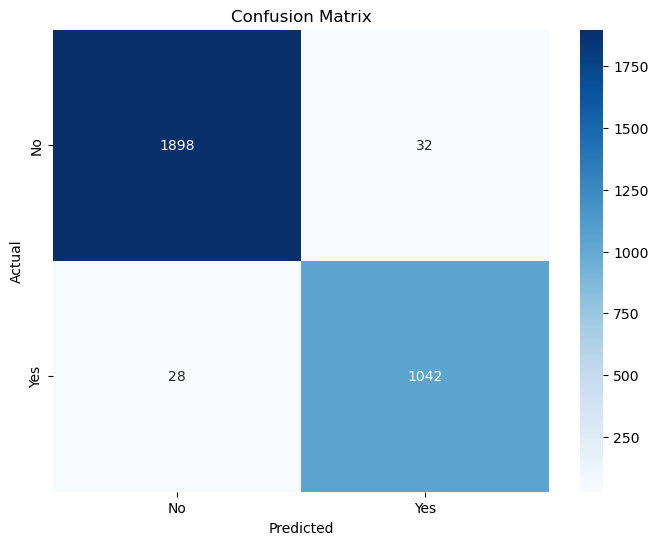

In [36]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show();

Here we can see the confusion matrix for the model. It shows:  
1) **1898** - These are the cases where the model correctly predicted the positive class (e.g., a patient is readmitted to the hospital), and the actual outcome was also **positive**.
2) **1042** - These are the cases where the model correctly predicted the negative class (e.g., a patient is not readmitted to the hospital), and the actual outcome was also **negative**.
3) **28** - These are the cases where the model incorrectly predicted the positive class when it should have been negative. In other words, the model gave a positive prediction, but the actual outcome was negative.
4) **32** - These are the cases where the model incorrectly predicted the negative class when it should have been positive. The model gave a negative prediction, but the actual outcome was positive

In [38]:
# Print classification report for additional performance metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.99      0.98      0.98      1930
         Yes       0.97      0.97      0.97      1070

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



The classification reports breaks down the model's performence further. Some key takeaways are:

1. **Precision**:
   - For the "No" class: Precision is 0.99, which means that when the model predicts "No" (negative class), it is correct 99% of the time.
   - For the "Yes" class: Precision is 0.97, indicating that when the model predicts "Yes" (positive class), it is correct 97% of the time.  
2. **Recall (Sensitivity)**:
   - For the "No" class: Recall is 0.98, meaning that the model correctly identifies 98% of the actual "No" cases.
   - For the "Yes" class: Recall is 0.97, indicating that the model captures 97% of the actual "Yes" cases.
3. **F1-Score**:
   - For the "No" class, the F1-score is 0.98, which is a harmonic mean of precision and recall. It provides a balanced measure of accuracy.
   - For the "Yes" class, the F1-score is 0.97, reflecting the balance between precision and recall for the "Yes" class.
4. **Support**:
   - The "support" column shows the number of instances in each class in the test dataset.
     - For the "No" class, there are 1,930 instances.
     - For the "Yes" class, there are 1,070 instances.
5. **Accuracy**:
   - The overall accuracy of the model is 0.98, or 98%. This indicates that 98% of the predictions (both "Yes" and "No" combined) are correct.
6. **Macro Avg**:
   - The "macro avg" row shows the average of precision, recall, and F1-score for both classes. In this case, the average is 0.98.
7. **Weighted Avg**:
   - The "weighted avg" row provides a weighted average of precision, recall, and F1-score. It takes into account the class imbalances, giving more weight to the class with more samples. In this case, the weighted average is 0.98.

In summary, the model appears to perform very well, with high precision, recall, and F1-scores for both the "Yes" and "No" classes. The high accuracy of 98% suggests that the model is effective at correctly classifying instances. However, it's essential to consider the specific context of the problem and any class imbalances when interpreting these results.